![title](Chapter-2.png "Header")
___
# Chapter 2 - Machine Learning Based Recommendation Systems
## Segment 4 - Evaluating Recommendation Systems

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, average_precision_score, confusion_matrix, plot_confusion_matrix,roc_curve, auc, f1_score, make_scorer, roc_auc_score


This bank marketing dataset is open-sourced and available for download at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

It was originally created by: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [2]:
bank_full = pd.read_csv('bank_full_w_dummy_vars.csv')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,0,0,0,0,1,1


In [3]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           45211 non-null  int64 
 1   job                           45211 non-null  object
 2   marital                       45211 non-null  object
 3   education                     45211 non-null  object
 4   default                       45211 non-null  object
 5   balance                       45211 non-null  int64 
 6   housing                       45211 non-null  object
 7   loan                          45211 non-null  object
 8   contact                       45211 non-null  object
 9   day                           45211 non-null  int64 
 10  month                         45211 non-null  object
 11  duration                      45211 non-null  int64 
 12  campaign                      45211 non-null  int64 
 13  pdays           

In [4]:
X = bank_full.iloc[:,[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]].values
y = bank_full.iloc[:,17].values

In [5]:
# check that outcome variable in binary
np.unique(y)

array([0, 1])

In [6]:
LogReg = LogisticRegression()
LogReg.fit(X, y)
y_pred = LogReg.predict(X)

In [7]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.67      0.17      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.79      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



Confusion matrix: 
 [[39489   433]
 [ 4404   885]]
Confusion matrix: 


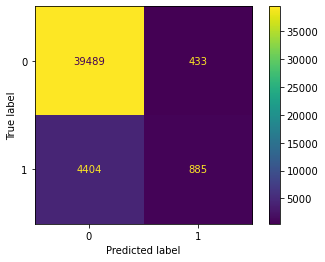

In [8]:
print(f'Confusion matrix: \n {confusion_matrix(y,y_pred)}')
print(f'Confusion matrix: \n {plot_confusion_matrix(LogReg,X,y)}')

In [10]:
print(f'ROC curve: \n {roc_curve(y,y_pred)}')
fpr, tpr, thresholds = roc_curve(y, y_pred)
print(f'AUC: \n {auc(fpr, tpr)}')
print(f'ROC AUC curve: \n {roc_auc_score(y,y_pred)}')
print(f'F1 score: \n {f1_score(y,y_pred,average="weighted")}')

ROC curve: 
 (array([0.        , 0.01084615, 1.        ]), array([0.        , 0.16732842, 1.        ]), array([2, 1, 0]))
AUC: 
 0.578241133738868
ROC AUC curve: 
 0.578241133738868
F1 score: 
 0.8633959637748442
